# 数据预处理

## 数据分析处理

In [1]:
import sys

#anaconda识别不出路径，需手动添加
sys.path.append("D:/Application/Anaconda/envs/ML/Lib/site-packages/")
sys.path.append("D:/Application/Graphviz/bin/dot.exe")

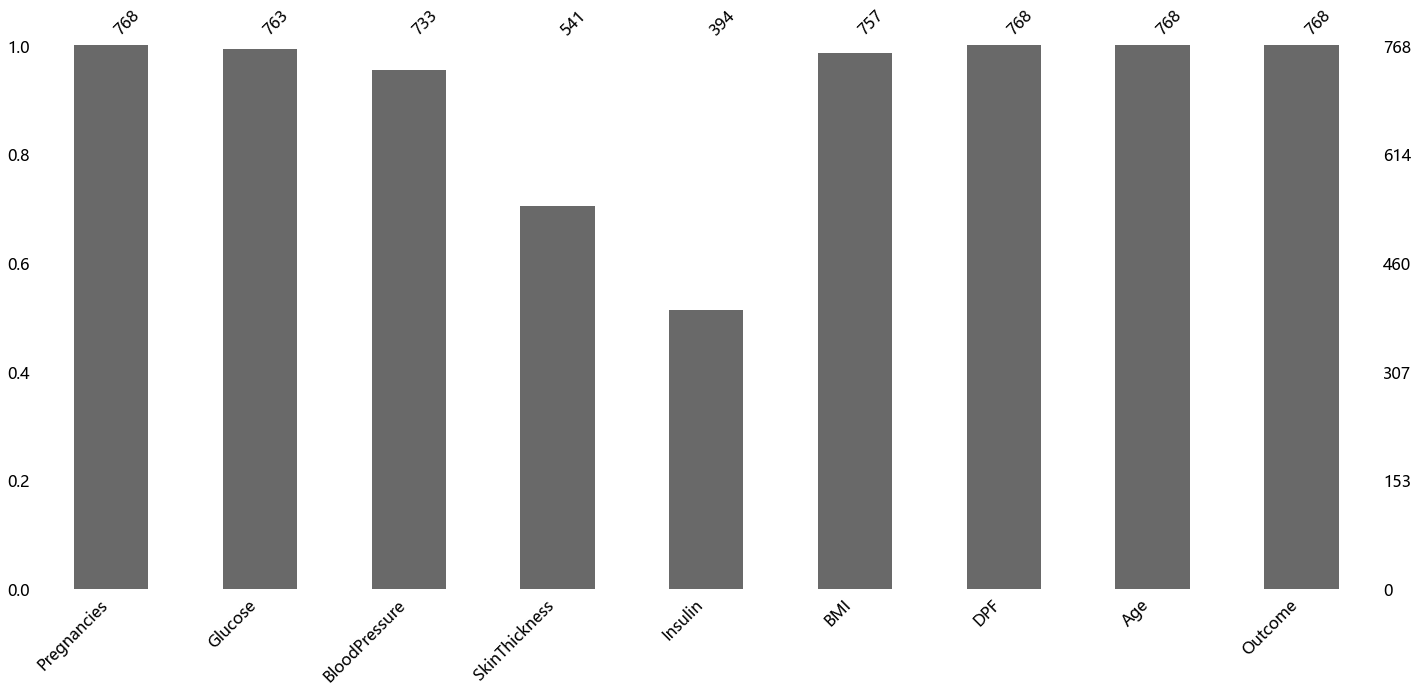

   Pregnancies  Glucose  BloodPressure  SkinThickness   BMI    DPF  Age  \
0            6    148.0      72.000000      35.000000  33.6  0.627   50   
1            1     85.0      66.000000      29.000000  26.6  0.351   31   
2            8    183.0      64.000000      33.000000  23.3  0.672   32   
3            1     89.0      66.000000      23.000000  28.1  0.167   21   
4            0    137.0      40.000000      35.000000  43.1  2.288   33   
5            5    116.0      74.000000      27.235457  25.6  0.201   30   
6            3     78.0      50.000000      32.000000  31.0  0.248   26   
7           10    115.0      70.877339      27.235457  35.3  0.134   29   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1  
5        0  
6        1  
7        0  


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
%matplotlib inline




plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False #负号显示问题
file_path = "E:\AppData\Python\ML\DM_predict\diabetes.csv"
df = pd.read_csv(file_path)


pd.set_option('display.max_columns',None)

#更改索引列名称
df.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)


# 数据清洗，Glucose\BloodPressure\SkinThickness\Insulin\BMI中的0替换为NaN
df_replace = df.copy(deep=True)
cols = [col for col in df.columns if col not in['Pregnancies','DPF','Age','Outcome']]
df_replace[cols]=\
df_replace[cols].replace(0,np.nan)

#msno用于显示无效数据
pic=msno.bar(df_replace)
plt.savefig("pic.png")
plt.show()


#删除缺失比例>40%的列    
thresh_count=df_replace.shape[0]*0.55
df_replace.dropna(thresh=thresh_count,axis=1,inplace=True)
cols = [col for col in df_replace.columns if col not in['Pregnancies','DPF','Age','Outcome']]


# 将nan用均值填充
def mean_fillna(index):
    data_notnull = df_replace[df_replace[index].notnull()]
    #求均值
    df_mean = data_notnull[[index]].groupby(by=df['Outcome'])[[index]].mean()
    #填充
    df_replace.loc[(df_replace['Outcome']==0)&(df_replace[index].isnull()),index]=df_replace.loc[(df_replace['Outcome']==0)&(df_replace[index].isnull()),index].fillna(df_mean.loc[0,index])
    df_replace.loc[(df_replace['Outcome']==1)&(df_replace[index].isnull()),index]=df_replace.loc[(df_replace['Outcome']==1)&(df_replace[index].isnull()),index].fillna(df_mean.loc[1,index])
    return df_replace



# 遍历cols每列进行填充
for col in cols:
    mean_fillna(col)
print(df_replace.head(8))


In [3]:
print(df_replace[cols])

     Glucose  BloodPressure  SkinThickness   BMI
0      148.0           72.0           35.0  33.6
1       85.0           66.0           29.0  26.6
2      183.0           64.0           33.0  23.3
3       89.0           66.0           23.0  28.1
4      137.0           40.0           35.0  43.1
..       ...            ...            ...   ...
763    101.0           76.0           48.0  32.9
764    122.0           70.0           27.0  36.8
765    121.0           72.0           23.0  26.2
766    126.0           60.0           33.0  30.1
767     93.0           70.0           31.0  30.4

[768 rows x 4 columns]


In [4]:
data_notnull = df_replace[df_replace['SkinThickness'].notnull()]
print(data_notnull)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI    DPF  Age  \
0              6    148.0           72.0           35.0  33.6  0.627   50   
1              1     85.0           66.0           29.0  26.6  0.351   31   
2              8    183.0           64.0           33.0  23.3  0.672   32   
3              1     89.0           66.0           23.0  28.1  0.167   21   
4              0    137.0           40.0           35.0  43.1  2.288   33   
..           ...      ...            ...            ...   ...    ...  ...   
763           10    101.0           76.0           48.0  32.9  0.171   63   
764            2    122.0           70.0           27.0  36.8  0.340   27   
765            5    121.0           72.0           23.0  26.2  0.245   30   
766            1    126.0           60.0           33.0  30.1  0.349   47   
767            1     93.0           70.0           31.0  30.4  0.315   23   

     Outcome  
0          1  
1          0  
2          1  
3          0  


0    500
1    268
Name: Outcome, dtype: int64


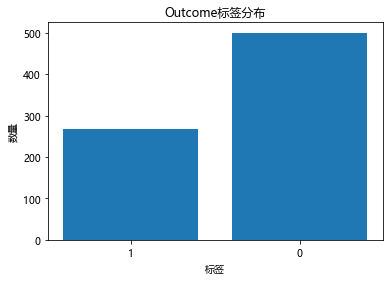

       Pregnancies     Glucose  BloodPressure  SkinThickness        BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.00000   
mean      3.845052  121.697358      72.428141      29.247042   32.44642   
std       3.369578   30.462008      12.106044       8.923908    6.87897   
min       0.000000   44.000000      24.000000       7.000000   18.20000   
25%       1.000000   99.750000      64.000000      25.000000   27.50000   
50%       3.000000  117.000000      72.000000      28.000000   32.05000   
75%       6.000000  141.000000      80.000000      33.000000   36.60000   
max      17.000000  199.000000     122.000000      99.000000   67.10000   

              DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.62625

In [5]:
# print(df_replace.describe())
#查看结果分布
p=df_replace.Outcome.value_counts()
print(p)
_x=df_replace['Outcome'].unique()
plt.bar(_x,p.values)
plt.xticks(list(range(len(_x))),_x)
plt.title("Outcome标签分布")

plt.xlabel("标签")
plt.ylabel("数量")
plt.show()
print(df_replace.describe())

##  特征选取、热力图、相关性矩阵

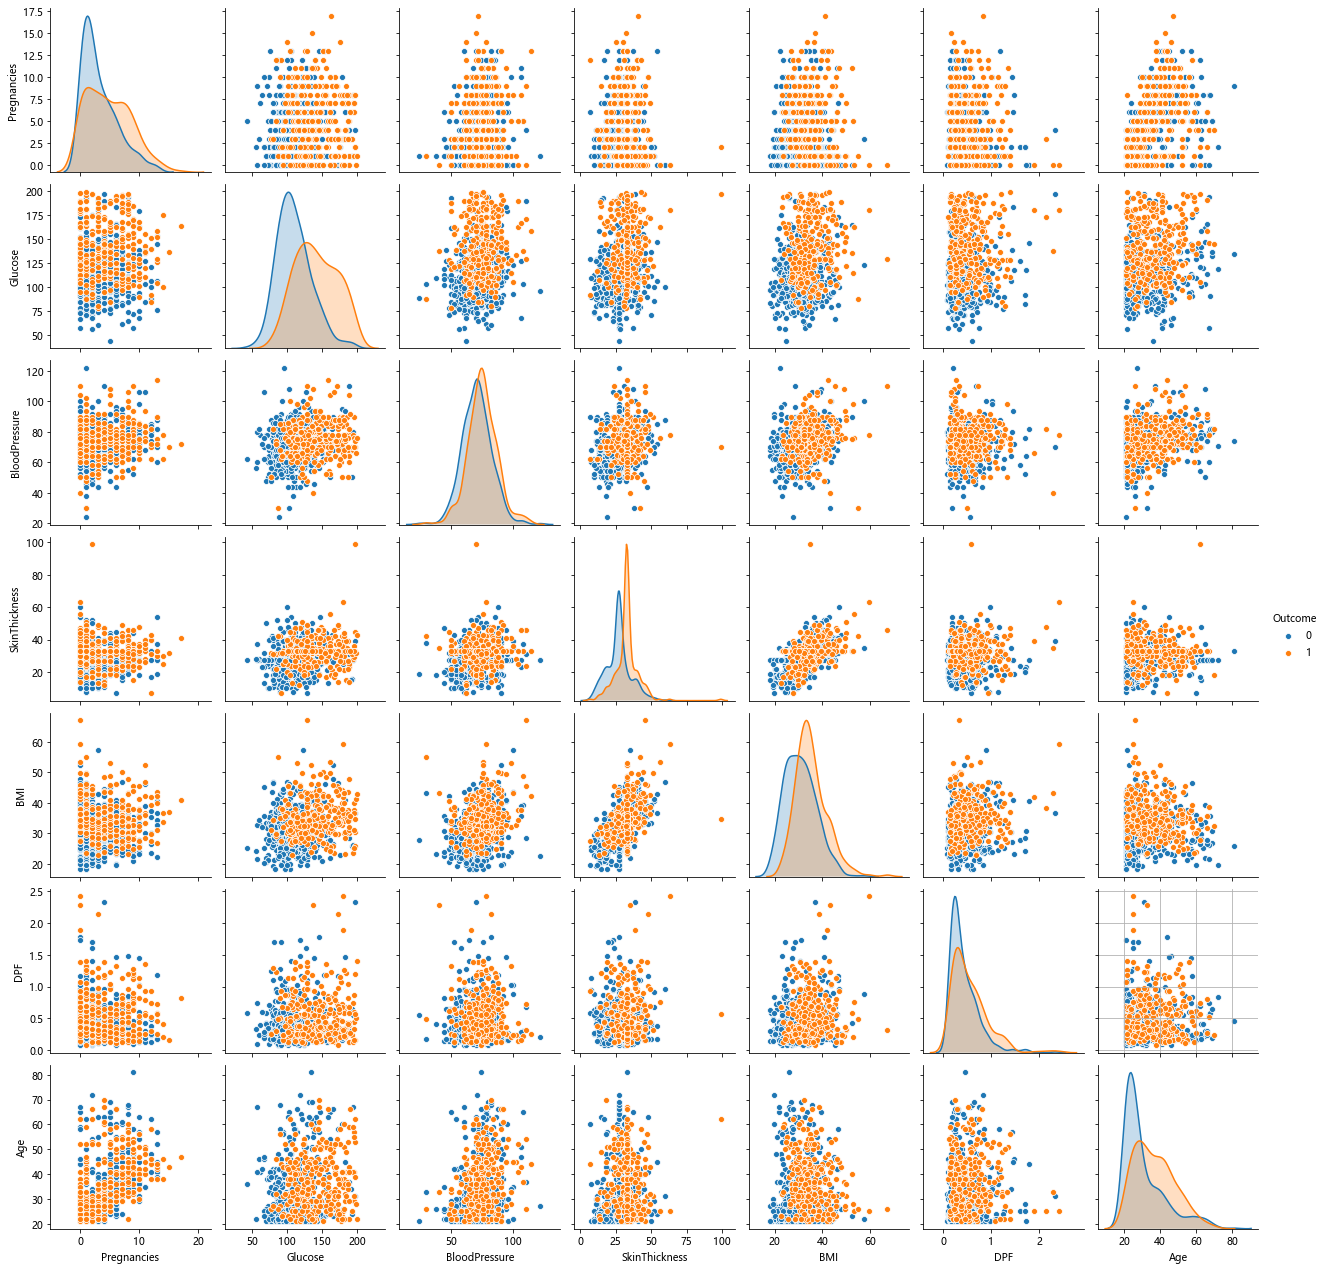

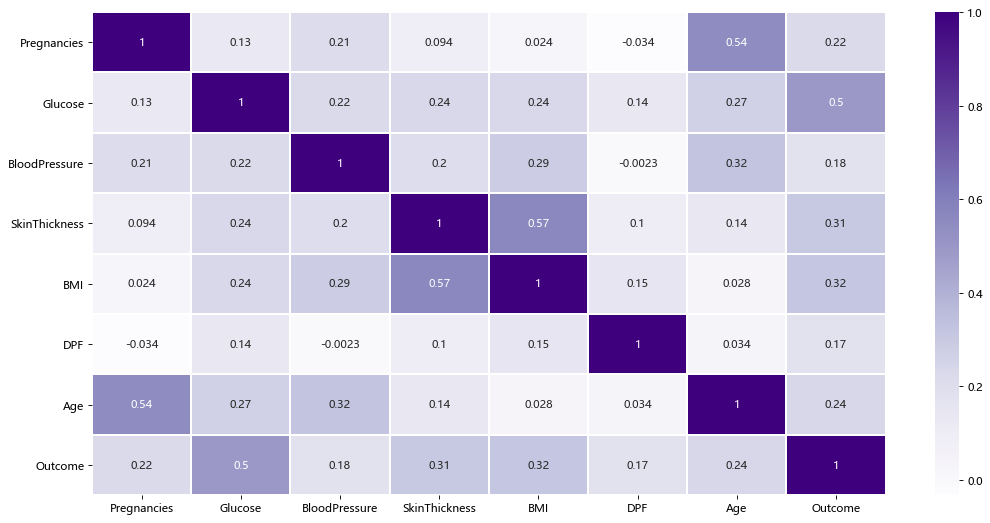

In [6]:
import seaborn as sns


sns.pairplot(df_replace,hue="Outcome")
plt.grid()
plt.show()

#特征相关性
corr_df_replace = df_replace.corr()
corr_df_replace['Outcome'].sort_values(ascending = False)


#热力图:颜色越深，患病概率越大
plt.figure(figsize=(16,8),dpi=80)
sns.heatmap(corr_df_replace,vmax=1,annot=True,linewidths=1,cmap="Purples")
plt.show()



## 数据标准化,（初始数据不服从正态分布，使得不同的特征具有相同的尺度）

In [7]:

sc = StandardScaler()
cols_noOutcome=[col for col in df_replace.columns if col not in['Outcome']]
sc_df = pd.DataFrame(sc.fit_transform(df_replace.drop(['Outcome'],axis=1)),columns=cols_noOutcome)

sc_df.head()
print(sc_df.head())



   Pregnancies   Glucose  BloodPressure  SkinThickness       BMI       DPF  \
0     0.639947  0.864020      -0.035389       0.645088  0.167806  0.468492   
1    -0.844885 -1.205478      -0.531332      -0.027701 -0.850452 -0.365061   
2     1.233880  2.013741      -0.696647       0.420825 -1.330487  0.604397   
3    -0.844885 -1.074081      -0.531332      -0.700491 -0.632253 -0.920763   
4    -1.141852  0.502679      -2.680419       0.645088  1.549727  5.484909   

        Age  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496  


In [8]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1  


## 数据分割，确定训练集、测试集

In [9]:
from sklearn.model_selection import train_test_split

#eightcols_noOutcome中未清除胰岛素列
eightcols_noOutcome=[col for col in df.columns if col not in['Outcome']]

#将数据切分为特征x和标签y
x=sc_df
y=df_replace.Outcome
#划分数据集
#stratify=y保证切分后的训练集和测试集跟切分前y中的0、1的比例一致
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2021)

#决策树不需要标准化，重新分割数据
dt_x=df[cols_noOutcome]
dt_y=df.Outcome

dt_x_train,dt_x_test,dt_y_train,dt_y_test=train_test_split(dt_x,dt_y,test_size=0.2,stratify=dt_y,random_state=2021)

#xgboost含自动处理缺失数据机制
xgb_x=df[cols_noOutcome]
xgb_y=df.Outcome

xgb_x_train,xgb_x_test,xgb_y_train,xgb_y_test=train_test_split(xgb_x,xgb_y,test_size=0.2,stratify=xgb_y,random_state=2021)


## 打印数据集信息

In [10]:
print(df.describe())
print(df.info())
print(df.head())
print("▬"*50)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(x_train.describe())
print("▬"*50)
print(sc_df) #标准化之后的没有Outcome的数据
print(df_replace)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.

## 学习曲线

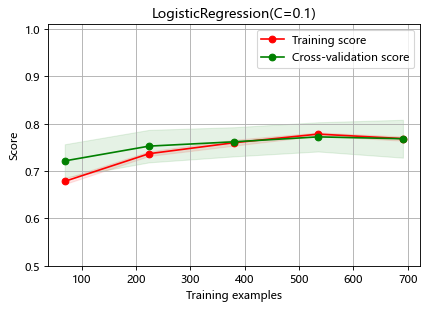

In [11]:
#绘制学习曲线，以确定模型的状况
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    参数解释
    ----------
    estimator : 分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    np.linspace(.1, 1.0, 5)：把训练集从0.1到1.0划分为5份
    """
    
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=10, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(dpi=80)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.grid("on")
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
     
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    plt.show()
    
X=sc_df[cols_noOutcome]
y=df_replace['Outcome']
    
plot_learning_curve(LogisticRegression(C=0.01), "LogisticRegression(C=0.1)",X, y, ylim=(0.5, 1.01),
                    train_sizes=np.linspace(.1,1.0, 5))




## 验证曲线

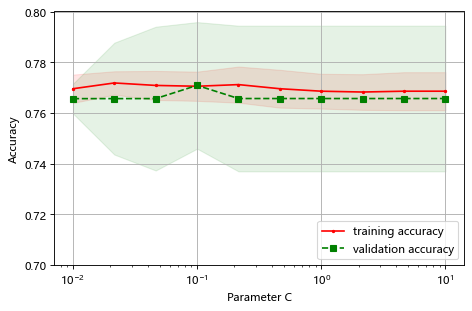

In [12]:
from sklearn.model_selection import validation_curve

param_name="C"
param_range = np.logspace(-2,1,10)



train_scores, test_scores = validation_curve(
                estimator=LogisticRegression(C=0.1), 
                X=x, 
                y=y, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 
plt.figure(dpi=80)
plt.plot(param_range, train_mean, 
         color='r', marker='o', 
         markersize=2, label='training accuracy')
 
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.1,
                 color='r')
 
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
 
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.1, color='g')
 
plt.grid("on")
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.8])
plt.tight_layout()
plt.show()


## 查看每个特征的重要程度

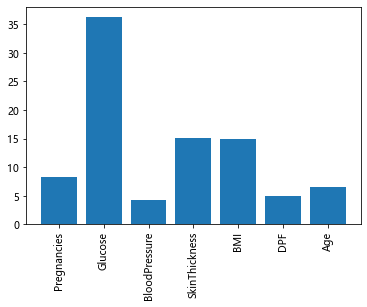

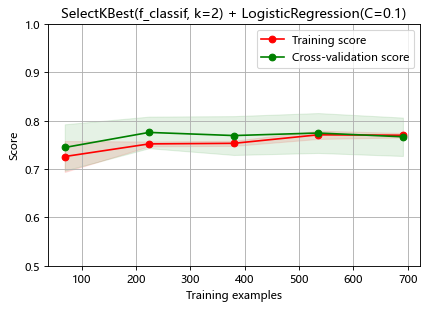

In [13]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import Pipeline

selector=SelectKBest(f_classif,k=7)
selector.fit(x_train,y_train)
scores=-np.log10(selector.pvalues_)

plt.bar(range(len(cols_noOutcome)),scores)
plt.xticks(range(len(cols_noOutcome)),cols_noOutcome,rotation='vertical')
plt.show()

#直接使用SelectKBest之后绘制学习曲线
plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=7)), # select two features
                               ("svc", LogisticRegression(C=0.1))]), "SelectKBest(f_classif, k=2) + LogisticRegression(C=0.1)",X, y, ylim=(0.5, 1.0), train_sizes=np.linspace(.1, 1.0, 5))



In [14]:
#保存每个模型的训练得分情况
log=[]

# 逻辑回归

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR=LogisticRegression(C=0.1)
LR.fit(x_train,y_train)

LR_auc=LR.predict(x_test)
print(classification_report(y_test,LR_auc))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [16]:
outcomes=confusion_matrix(y_test, LR_auc) #混淆模型
LR_scores=accuracy_score(y_test, LR_auc)
print(LR_scores)
print(outcomes)
# print(scores)
# log.append(['LogisticRegression',LR_scores*100])
# print(log)

0.7792207792207793
[[88 12]
 [22 32]]


# KNN

## 寻找K值

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':range(1,50)}
clf=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
clf.fit(X,y)
print("Accuracy：%.2f"%clf.best_score_,"最佳K值",clf.best_params_)

Accuracy：0.78 最佳K值 {'n_neighbors': 35}


## 训练

In [18]:
KNN=KNeighborsClassifier(n_neighbors=35)
KNN.fit(x_train,y_train)

print(KNN.score(x_test,y_test))



0.7922077922077922


# 决策树模型

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report,accuracy_score,recall_score,roc_auc_score


dtree=DecisionTreeClassifier(criterion='entropy',
                            min_weight_fraction_leaf=0.01 #叶子节点包含的最小样本数，防止过拟合
                            )
dtree.fit(x_train,y_train)
#指标计算
dt_model=dtree.predict(x_test)

#查看准确率
dtree.score(x_test,y_test)
dt_roc_auc=roc_auc_score(y_test,dtree.predict(x_test))
print(classification_report(y_test,dt_model))
# print(dtree.score(x_test,y_test))
print("%.4f"%dt_roc_auc)



              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.69      0.72        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

0.7826


## 模型优化

In [20]:
param_grid={'max_depth':np.arange(5,10),
               'min_samples_split':np.arange(4,30),
               'min_samples_leaf':np.arange(4,30)}
DT_model=GridSearchCV(dtree,param_grid,cv=5)
DT_model.fit(dt_x_train,dt_y_train)
print(DT_model.best_estimator_)
DT_model.score(dt_x_test,dt_y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=14,
                       min_samples_split=7, min_weight_fraction_leaf=0.01)


0.7662337662337663

In [21]:

param_grid={'max_depth':np.arange(2,6),
               'min_samples_split':np.arange(2,20),
               'min_samples_leaf':np.arange(15,20)}
DT_model=GridSearchCV(dtree,param_grid,cv=5)
DT_model.fit(dt_x_train,dt_y_train)
print(DT_model.best_estimator_)
DT_scores=DT_model.score(dt_x_test,dt_y_test)
print(DT_scores)

# log.append(['DecisionTree',"%.4f%%"%(DT_scores*100)])
# print(log)
# log.clear()
# print(log)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=17,
                       min_weight_fraction_leaf=0.01)
0.7337662337662337


## 特征重要性

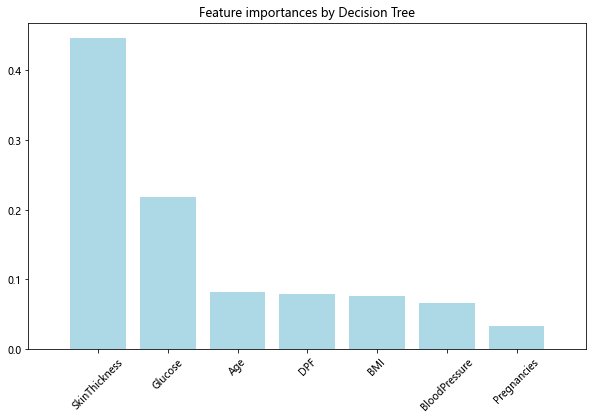

In [22]:
feature_names=df_replace[cols_noOutcome].columns

importances=dtree.feature_importances_
indices=np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature importances by Decision Tree")
plt.bar(range(len(indices)),importances[indices],color='lightblue',align="center")
plt.xticks(range(len(indices)),feature_names[indices],rotation='45')
plt.xlim([-1,len(indices)])
plt.show()



## 可视化

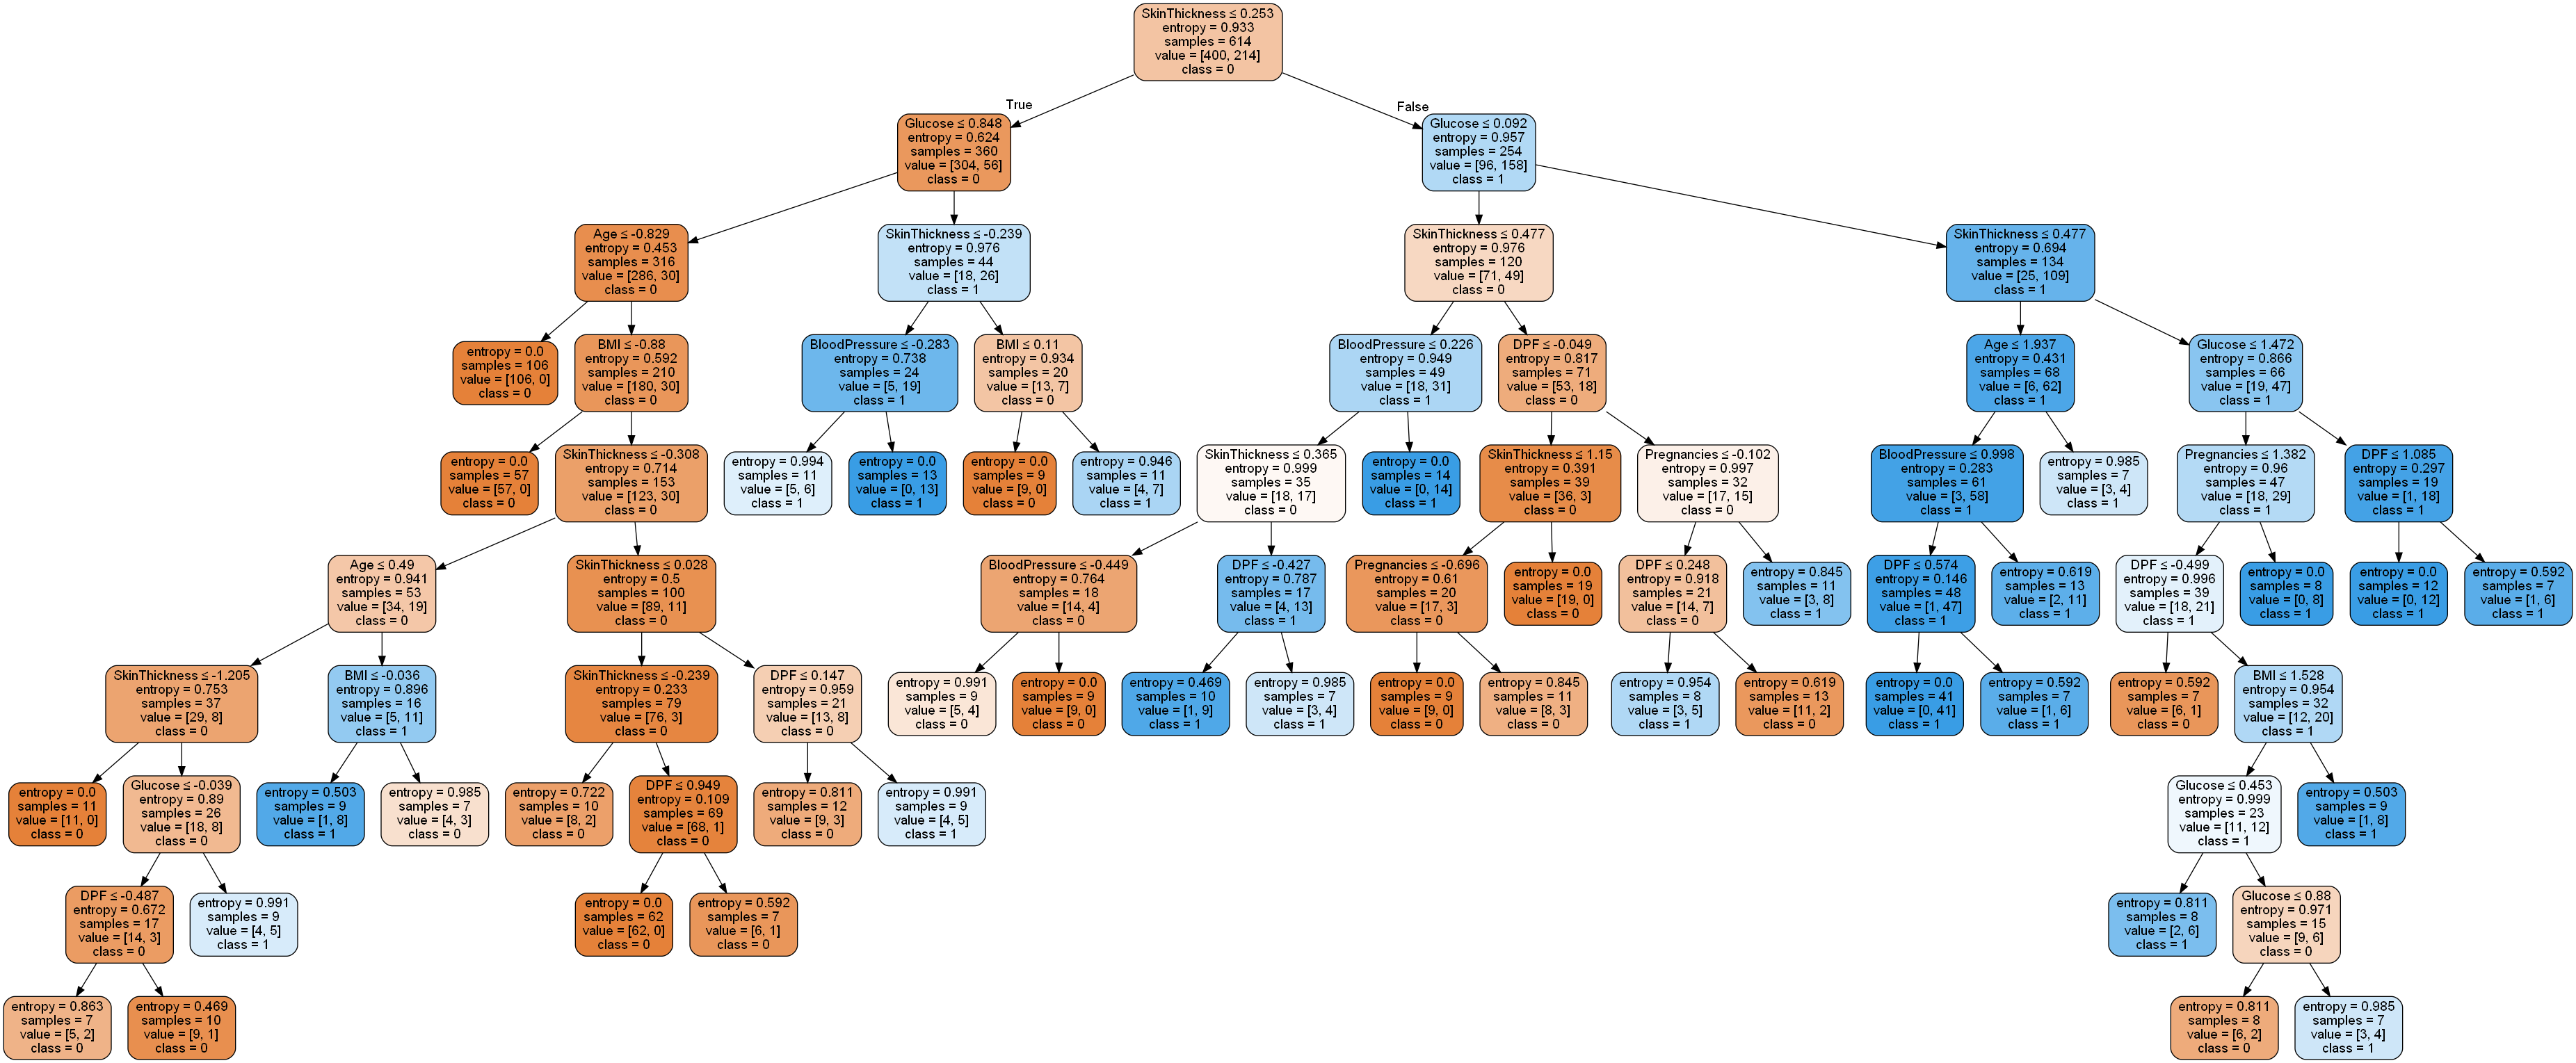

In [23]:

from sklearn import tree
from io import StringIO
import os
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


#特征



#文件缓存
DT_dot_data=StringIO()
#将决策树导入到dot中
export_graphviz(dtree,out_file=DT_dot_data,filled=True,rounded=True,
               special_characters=True,feature_names=feature_names,class_names=['0','1'])
DT_graph=pydotplus.graph_from_dot_data(DT_dot_data.getvalue())

#保存文件为png格式
DT_graph.write_png('DT_diabetes.png')
#显示
Image(DT_graph.create_png())



# 随机森林

## 建立模型

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',
                         n_estimators=50,
                         max_depth=None,#数的最大深度，防止过拟合
                          min_samples_split=10,#定义多少个样本的情况下才继续分叉
                          min_weight_fraction_leaf=0.01
                         )
#模型训练
rf.fit(x_train,y_train)
#计算指标参数

rf_roc_auc=roc_auc_score(y_test,rf.predict(x_test))
print("%.4f"%rf_roc_auc)
print(classification_report(y_test,rf.predict(x_test)))



0.7926
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       100
           1       0.79      0.69      0.73        54

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



## 可视化

In [25]:
#可视化
Estimators=rf.estimators_
#遍历森林中的每棵树
# for index,RF_model in enumerate(Estimators):
#     RF_dot_data=StringIO()#文件缓存
#     #将决策树导入到RF_dot_data中
#     export_graphviz(RF_model,out_file=RF_dot_data,feature_names=feature_names,
#                    class_names=['0','1'],
#                     filled=True,
#                     rounded=True,
#                     special_characters=True
#                    )
#     #从数据中生成graph
#     RF_graph=pydotplus.graph_from_dot_data(RF_dot_data.getvalue())
#     RF_graph.write_png('RF{}.png'.format(index))
#     plt.figure(figsize=(20,20))
#     plt.imshow(plt.imread('RF{}.png'.format(index)))
#     plt.axis('off')

## 特征重要性

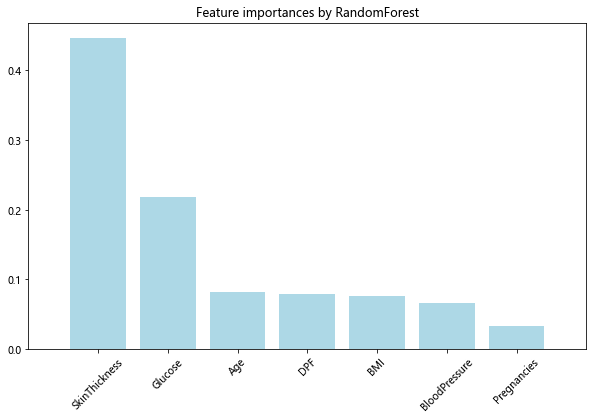

In [26]:
rf_importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)),importances[indices],color='lightblue',align="center")
plt.xticks(range(len(indices)),feature_names[indices],rotation='45')
plt.xlim([-1,len(indices)])
plt.show()



# XGBoost

## 原生接口

In [30]:

import time
from xgboost import plot_importance,plot_tree
import xgboost as xgb

# 训练算法参数设置
params = {
    # 通用参数
    'booster': 'gbtree', # 使用的弱学习器,有两种选择gbtree（默认）和gblinear,gbtree是基于
                        # 树模型的提升计算，gblinear是基于线性模型的提升计算
    'nthread': 4, # XGBoost运行时的线程数，缺省时是当前系统获得的最大线程数
    'silent':0, # 0：表示打印运行时信息，1：表示以缄默方式运行，默认为0
    'num_feature':7, # boosting过程中使用的特征维数
    'seed': 1234, # 随机数种子
    # 任务参数
    'objective': 'multi:softmax', # 多分类的softmax,objective用来定义学习任务及相应的损失函数
    'num_class': 2, # 类别总数
    # 提升参数
    'gamma': 0.1, # 叶子节点进行划分时需要损失函数减少的最小值
    'max_depth': 6, # 树的最大深度，缺省值为6，可设置其他值
    'lambda': 0.1, # 正则化权重
    'subsample': 0.8, # 训练模型的样本占总样本的比例，用于防止过拟合
    'colsample_bytree': 1.0, # 建立树时对特征进行采样的比例
    'min_child_weight': 1, # 叶子节点继续划分的最小的样本权重和
    'eta': 0.1, # 加法模型中使用的收缩步长   
    
}
plst = list(params.items())


In [33]:
#数据集格式转换
dtrain=xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test)
#迭代次数
num_rounds=40
XGBoost=xgb.train(plst,dtrain,num_rounds)
#预测
XGB_pred=XGBoost.predict(dtest)
#计算准确率
XGB_score=accuracy_score(y_test,XGB_pred)
print("%.4f%%"%(XGB_score*100))

[09:57:44] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:57:44] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
83.7662%


## 可视化

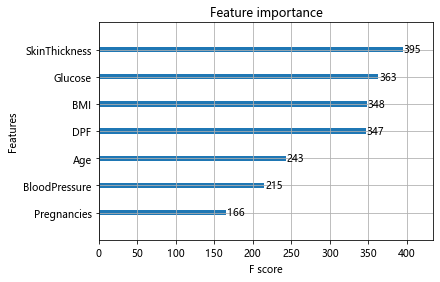

In [35]:
#显示重要特征
plot_importance(XGBoost)
plt.show()

In [ ]:
from xgboost import plot_tree
import graphviz
os.environ["PATH"] += os.pathsep + 'D:/Application/Graphviz/bin/dot.exe'
# print(os.path)
print(sys.path)
plot_tree(XGB_model,num_trees=5)
# plt.show()
# plot_tree(XGB_model,num_trees=5)



In [ ]:
XGB_model.dump_model("XGB_model.txt")

## sklearn 接口

In [36]:
XGB_model=xgb.XGBClassifier(max_depth=8,n_estimators=40,silent=True,objective ='binary:logistic',
                            learning_rate=0.01,
                            alpha=0.1,
                            feature_names=feature_names)
XGB_model.fit(x_train,y_train)

#预测
XGB_pred=XGB_model.predict(x_test)

XGB_accuracy=accuracy_score(y_test,XGB_pred)
print("%.2f%%"%(XGB_accuracy*100))

[09:58:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { feature_names, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:58:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
83.77%


D:/Application/Anaconda/envs/ML/Lib/site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# log结果数据可视化

In [ ]:
# log=pd.DataFrame(log)
# log.rename(columns={0:"Classifier",1:"Accuracy"},inplace=True)
# sns.barplot(x="Accuracy",y="Classifier",data=log,color="b")
# plt.xlabel("Accuracy%")
# plt.title("分类器得分评估")
print(log)

# 模型评估

## 准确率

In [38]:
def assess_model_auc(model_auc_names,model):
    model_auc=model.predict(x_test)
    print("▬"*20,model_auc_names,"▬"*20,"\n")
    print(classification_report(y_test,model_auc))
    
LR_auc=LR.predict(x_test)
KNN_auc=KNN.predict(x_test)
dt_auc=dtree.predict(x_test)
rf_auc=rf.predict(x_test)
xgb_auc=XGB_model.predict(x_test)

assess_model_auc('LR_auc',LR)
assess_model_auc('KNN_auc',KNN)
assess_model_auc('Dtree_auc',dtree)
assess_model_auc('RF_auc',rf)
assess_model_auc('XGBoost_auc',XGB_model)


▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ LR_auc ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ KNN_auc ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.74      0.63      0.68        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ Dtree_auc ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.69      0.72        54

    accuracy             

## ROC曲线

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

0.7362962962962963
▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

0.7548148148148149
▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

0.7825925925925925
▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ ▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 

0.7925925925925925


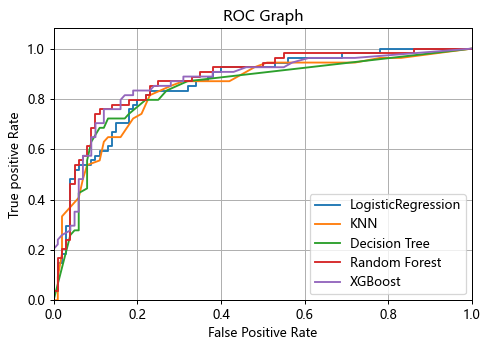

In [39]:
from sklearn.metrics import roc_curve

def assess_model_roc(model_roc_names,model):
    model_roc=model.predict(x_test)
    print("▬"*20,"▬"*20,"\n")
    model_roc_names=roc_auc_score(y_test,model_roc)
    print(model_roc_names)
    
assess_model_roc('lr_roc_auc',LR)
assess_model_roc('knn_roc_auc',KNN)
assess_model_roc('dt_roc_auc',dtree)
assess_model_roc('rf_roc_auc',rf)

lr_roc_auc=roc_auc_score(y_test,LR.predict(x_test))
knn_roc_auc=roc_auc_score(y_test,KNN.predict(x_test))
dt_roc_auc=roc_auc_score(y_test,dtree.predict(x_test))
rf_roc_auc=roc_auc_score(y_test,rf.predict(x_test))
xgb_roc_auc=roc_auc_score(y_test,XGB_model.predict(x_test))




lr_fpr,lr_tpr,lr_thresholds=roc_curve(y_test,LR.predict_proba(x_test)[:,1])
knn_fpr,knn_tpr,knn_thresholds=roc_curve(y_test,KNN.predict_proba(x_test)[:,1])
dt_fpr,dt_tpr,dt_thresholds=roc_curve(y_test,dtree.predict_proba(x_test)[:,1])
rf_fpr,rf_tpr,rf_thresholds=roc_curve(y_test,rf.predict_proba(x_test)[:,1])
xgb_fpr,xgb_tpr,xgb_thresholds=roc_curve(y_test,XGB_model.predict_proba(x_test)[:,1])



plt.figure(dpi=90)
plt.plot(lr_fpr,lr_tpr,label='LogisticRegression'%lr_roc_auc)
plt.plot(knn_fpr,knn_tpr,label='KNN'%knn_roc_auc)

plt.plot(dt_fpr,dt_tpr,label='Decision Tree'%dt_roc_auc)
plt.plot(rf_fpr,rf_tpr,label='Random Forest'%rf_roc_auc)
plt.plot(xgb_fpr,xgb_tpr,label='XGBoost'%xgb_roc_auc)


plt.grid()
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.08])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()



## 混淆矩阵

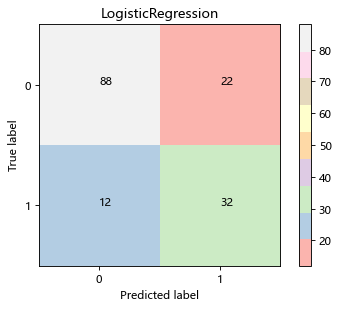

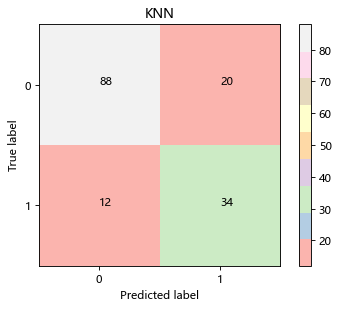

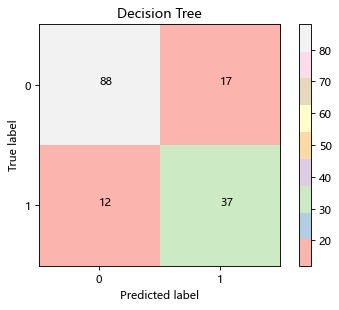

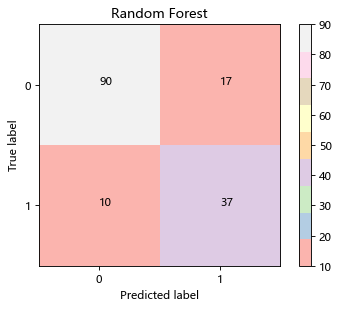

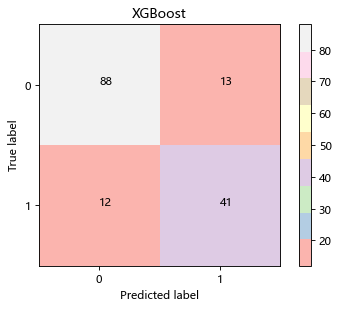

In [40]:
def plot_confusion_matrix(title,confusion_mat):  
    '''''将混淆矩阵画图并显示出来'''  
    plt.figure(dpi=80)
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Pastel1)  
    plt.title('Confusion matrix')  
    plt.colorbar()  
    tick_marks = np.arange(2)  
    plt.xticks(tick_marks, tick_marks)  
    plt.yticks(tick_marks, tick_marks)  
    plt.ylabel('True label')  
    plt.xlabel('Predicted label')  
    plt.title(title)
    for first_index in range(len(confusion_mat)):    #第几行
        for second_index in range(len(confusion_mat[first_index])):    #第几列
            plt.text(first_index, second_index, confusion_mat[first_index][second_index])
    plt.show()  

LR_outcomes=confusion_matrix(y_test, LR_auc)
KNN_outcomes=confusion_matrix(y_test, KNN_auc)
dt_outcomes=confusion_matrix(y_test, dt_auc)
rf_outcomes=confusion_matrix(y_test, rf_auc)
xgb_outcomes=confusion_matrix(y_test, xgb_auc)

model_title=['LR','KNN','DT','RF']
model_outcomes=['LR_outcomes','KNN_outcomes','dt_outcomes','rf_outcomes']

model_auc=['LR_auc','KNN_auc','dt_auc','rf_auc']


plot_confusion_matrix('LogisticRegression',LR_outcomes) 
plot_confusion_matrix('KNN',KNN_outcomes) 
plot_confusion_matrix('Decision Tree',dt_outcomes) 
plot_confusion_matrix('Random Forest',rf_outcomes)


plot_confusion_matrix('XGBoost',xgb_outcomes) 